In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm, neighbors
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_json('./data/train.json')
test_data = pd.read_json('./data/test.json')

In [4]:
train_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
test_data.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [6]:
print(train_data.isnull().sum())

cuisine        0
id             0
ingredients    0
dtype: int64


In [7]:
print(test_data.isnull().sum())

id             0
ingredients    0
dtype: int64


In [8]:
print(len(train_data['cuisine'].unique()), train_data['cuisine'].unique())

20 ['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


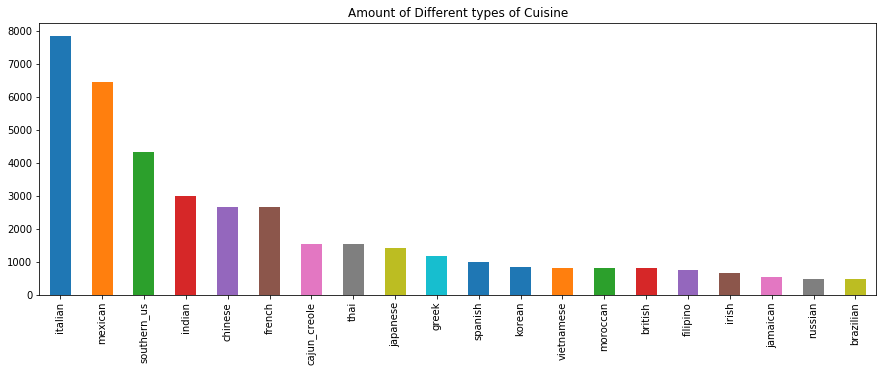

In [9]:
train_data['cuisine'].value_counts().plot.bar(
    title="Amount of Different types of Cuisine", 
    figsize=(15,5)
)

In [10]:
train_data['ingredients_st'] = train_data['ingredients'].map(lambda x: ', '.join(x))
test_data['ingredients_st'] = test_data['ingredients'].map(lambda x: ', '.join(x))

In [11]:
label = LabelEncoder()
train_data['cuisine_code'] = label.fit_transform(train_data['cuisine'])

In [12]:
train_data.head()

,cuisine,id,ingredients,ingredients_st,cuisine_code
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",6
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",16
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",4
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",7
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",7


In [13]:
train_data['ingredients_code'] = label.fit_transform(train_data['ingredients_st'])
test_data['ingredients_code'] = label.fit_transform(test_data['ingredients_st'])

In [14]:
cuisine_ing_count = {}
# get the unique cuisines 
for cuisine in train_data['cuisine'].unique().tolist():
    cuisine_ing_count[cuisine] = []
print(cuisine_ing_count)

{'greek': [], 'southern_us': [], 'filipino': [], 'indian': [], 'jamaican': [], 'spanish': [], 'italian': [], 'mexican': [], 'chinese': [], 'british': [], 'thai': [], 'vietnamese': [], 'cajun_creole': [], 'brazilian': [], 'french': [], 'japanese': [], 'irish': [], 'korean': [], 'moroccan': [], 'russian': []}


In [15]:
train_data[['cuisine', 'ingredients']].apply(lambda x: cuisine_ing_count[x[0]].append(len(x[1])), axis=1)

cuisine_max_median_mean_min = {}
for cuisine in train_data['cuisine'].unique().tolist():
    cuisine_max_median_mean_min[cuisine] = []

for cuisine, ing_count in cuisine_ing_count.items():
    median_count = np.median(ing_count)
    mean_count = np.mean(ing_count)
    max_count = np.max(ing_count)
    min_count = np.min(ing_count)
    
    cuisine_max_median_mean_min[cuisine] = [max_count, median_count, mean_count, min_count]
    

In [16]:
print(cuisine_max_median_mean_min)

{'greek': [27, 10.0, 10.182127659574467, 1], 'southern_us': [40, 9.0, 9.634953703703705, 1], 'filipino': [38, 10.0, 10.0, 2], 'indian': [49, 12.0, 12.705960705960706, 1], 'jamaican': [35, 12.0, 12.214828897338403, 2], 'spanish': [35, 10.0, 10.42366026289181, 1], 'italian': [65, 10.0, 9.909032916560347, 1], 'mexican': [52, 10.0, 10.87744641192917, 1], 'chinese': [38, 12.0, 11.98279087167976, 2], 'british': [30, 9.0, 9.708955223880597, 2], 'thai': [40, 12.0, 12.545808966861598, 1], 'vietnamese': [31, 12.0, 12.675151515151516, 1], 'cajun_creole': [31, 12.0, 12.617076326002588, 2], 'brazilian': [59, 9.0, 9.5203426124197, 2], 'french': [31, 9.0, 9.817838246409675, 1], 'japanese': [34, 9.0, 9.735066760365426, 1], 'irish': [27, 9.0, 9.299850074962519, 2], 'korean': [29, 11.0, 11.28433734939759, 2], 'moroccan': [31, 13.0, 12.909866017052375, 2], 'russian': [25, 10.0, 10.224948875255624, 2]}


In [17]:
train_data['max'] = train_data['cuisine'].map(lambda x: cuisine_max_median_mean_min[x][0])
train_data['median'] = train_data['cuisine'].map(lambda x: cuisine_max_median_mean_min[x][1])
train_data['mean'] = train_data['cuisine'].map(lambda x: cuisine_max_median_mean_min[x][2])
train_data['min'] = train_data['cuisine'].map(lambda x: cuisine_max_median_mean_min[x][3])

In [18]:
train_data['ing_count'] = train_data['ingredients'].map(lambda x: len(x))
test_data['ing_count'] = test_data['ingredients'].map(lambda x: len(x))

In [19]:
train_data.head()

,cuisine,id,ingredients,ingredients_st,cuisine_code,ingredients_code,max,median,mean,min,ing_count
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",6,28560,27,10.0,10.182128,1,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",16,26783,40,9.0,9.634954,1,11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",4,10595,38,10.0,10.000000,2,12
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",7,38379,49,12.0,12.705961,1,4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",7,2798,49,12.0,12.705961,1,20


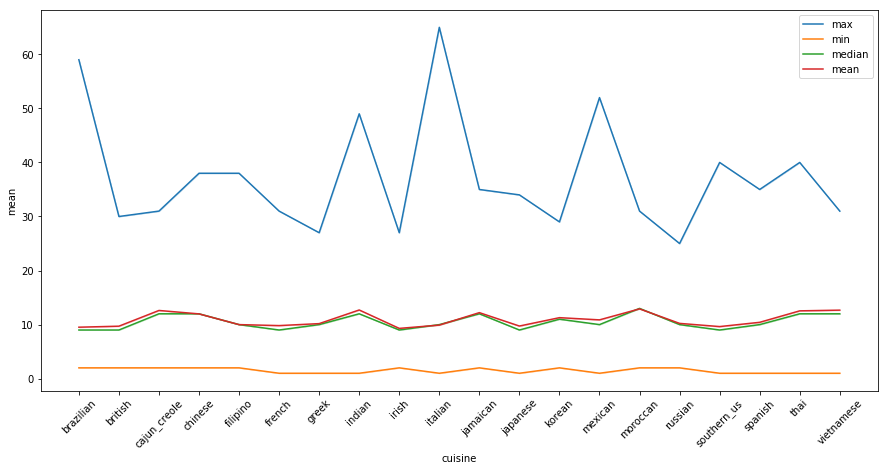

In [20]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)

sns.lineplot(x='cuisine', y='max', label='max', data=train_data)
sns.lineplot(x='cuisine', y='min', label='min', data=train_data)
sns.lineplot(x='cuisine', y='median', label='median', data=train_data)
sns.lineplot(x='cuisine', y='mean', label='mean', data=train_data)

In [21]:
unique_ingredients = set()
train_data['ingredients'].map(lambda x: [unique_ingredients.add(ing) for ing in x])
print(len(unique_ingredients ))

6714


In [22]:
ingredient_counts = {}
for ing in unique_ingredients:
    ingredient_counts[ing] = 0

In [23]:
def count_ingredients(x):
    for ing in x:
        ingredient_counts[ing] += 1
    
train_data['ingredients'].map(count_ingredients)
print(ingredient_counts['salt'])

ingredient_counts_df = pd.DataFrame(columns=['ingredients', 'count'], index=range(len(unique_ingredients)))

18049


In [24]:
ingredient_counts_df['ingredients'] = ingredient_counts.keys()
ingredient_counts_df['count'] = ingredient_counts.values()
ingredient_counts_df = ingredient_counts_df.sort_values(by=['count'], ascending=False)

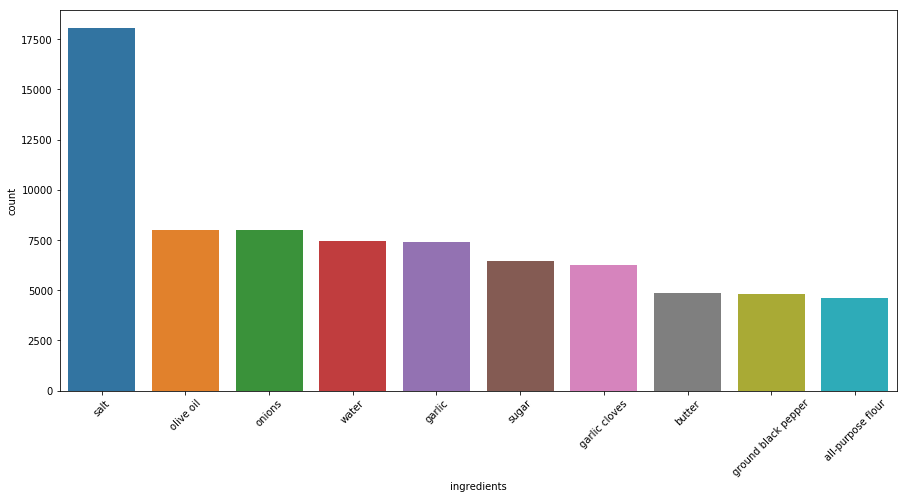

In [40]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)

sns.barplot(x='ingredients', y='count', data=ingredient_counts_df.head(10))


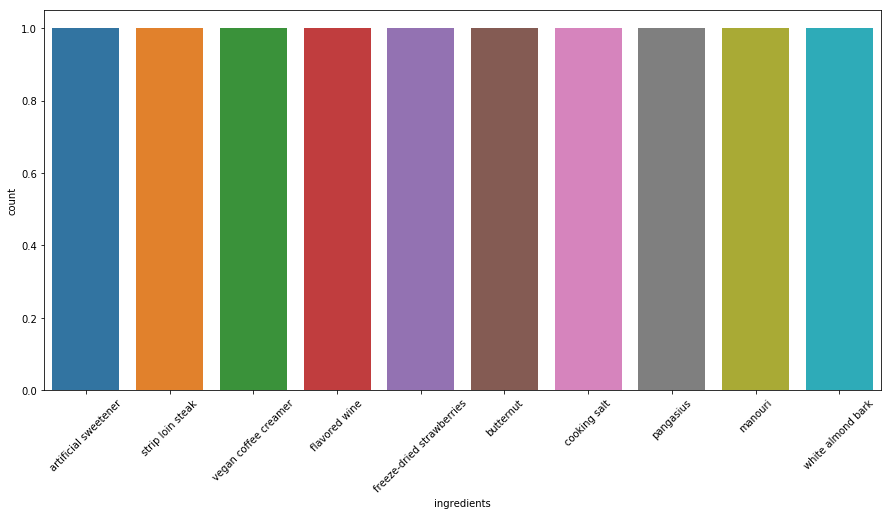

In [41]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)

sns.barplot(x='ingredients', y='count', data=ingredient_counts_df.tail(10))


In [45]:
cuisine_ingredients_count = {}
for cuisine in train_data['cuisine'].unique():
    cuisine_ingredients_count[cuisine] = {}
    for ing in unique_ingredients:
        cuisine_ingredients_count[cuisine][ing] = 0
print(cuisine_ingredients_count['greek'])

{'white almond bark': 0,
 'sliced meat': 0,
 'fresh lavender': 0,
 'India Pale Ale': 0,
 'jeera': 0,
 'frozen petit pois': 0,
 'back ribs': 0,
 'Pillsburyâ„¢ Crescent Recipe CreationsÂ® refrigerated seamless dough sheet': 0,
 'milk chocolate chips': 0,
 "devil's food cake mix": 0,
 'cointreau': 0,
 'boneless pork tenderloin': 0,
 'low-fat deli ham': 0,
 'toasted peanuts': 0,
 'green onions': 0,
 'grated lemon zest': 0,
 'scotch bonnet chile': 0,
 'hoagie rolls': 0,
 'italian pork sausage': 0,
 'condensed cream of chicken soup': 0,
 'clove garlic, fine chop': 0,
 'bresaola': 0,
 'canned black beans': 0,
 'harissa': 0,
 'peppercorns': 0,
 'mild olive oil': 0,
 'ciabatta': 0,
 'Spice Islands Ground Cumin Seed': 0,
 'small capers, rins and drain': 0,
 'coars ground black pepper': 0,
 'rocket leaves': 0,
 'chipotle sauce': 0,
 'whole okra': 0,
 'Haas avocados': 0,
 'garam masala': 0,
 'duck sauce': 0,
 'skinless chicken breast fillets': 0,
 'water spinach': 0,
 'celtic salt': 0,
 'creamy gr

In [77]:
def count_cuisine_ingredient(x):
    cuisine = x[0]
    ingredients = x[1]
    for ing in ingredients:
        cuisine_ingredients_count[cuisine][ing] += 1
    
    
train_data[['cuisine', 'ingredients']].apply(count_cuisine_ingredient, axis=1)
print('')

In [78]:
print(cuisine_ingredients_count['greek'])

{'white almond bark': 0, 'sliced meat': 0, 'fresh lavender': 0, 'India Pale Ale': 0, 'jeera': 0, 'frozen petit pois': 0, 'back ribs': 0, 'Pillsburyâ„¢ Crescent Recipe CreationsÂ® refrigerated seamless dough sheet': 0, 'milk chocolate chips': 0, "devil's food cake mix": 0, 'cointreau': 0, 'boneless pork tenderloin': 0, 'low-fat deli ham': 0, 'toasted peanuts': 0, 'green onions': 55, 'grated lemon zest': 40, 'scotch bonnet chile': 0, 'hoagie rolls': 0, 'italian pork sausage': 0, 'condensed cream of chicken soup': 1, 'clove garlic, fine chop': 1, 'bresaola': 0, 'canned black beans': 0, 'harissa': 1, 'peppercorns': 2, 'mild olive oil': 1, 'ciabatta': 0, 'Spice Islands Ground Cumin Seed': 0, 'small capers, rins and drain': 0, 'coars ground black pepper': 0, 'rocket leaves': 5, 'chipotle sauce': 0, 'whole okra': 0, 'Haas avocados': 0, 'garam masala': 0, 'duck sauce': 0, 'skinless chicken breast fillets': 0, 'water spinach': 0, 'celtic salt': 0, 'creamy gravy': 0, 'butter flavor vegetable sho

In [80]:
cuisine_length = len(train_data['cuisine'].unique())
ingredients_length = len(unique_ingredients)
cuisine_ingredients_count_df = pd.DataFrame(columns=['cuisine', 'ingredients', 'count'], 
                                            index=range(cuisine_length*ingredients_length))

In [94]:
row = 10
if row % ingredients_length == 0:
    cuisine_ingredients_count_df.loc['cuisine', row] = 'test'

In [ ]:
row_index = 0
for cuisine, ingredients in cuisine_ingredients_count.items():
    for ingredient, count in ingredients.items():
        cuisine_ingredients_count_df[row_index, 'cuisine'] = cuisine
        cuisine_ingredients_count_df[row_index, 'ingredient'] = ingredient
        cuisine_ingredients_count_df[row_index, 'count'] = count
        row_index += 1

In [ ]:
cuisine_ingredients_count_df.head()